In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Predicting the continous values

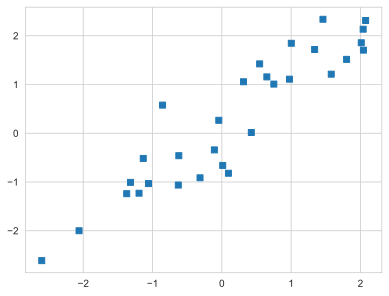

In [2]:
n = 30
x = torch.randn(n, 1)
y = x + torch.randn(n, 1)/2

plt.plot(x, y, 's') 

In [3]:
ann_reg = nn.Sequential(nn.Linear(1, 1), nn.ReLU(), nn.Linear(1, 1))
ann_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [4]:
learning_rate = 0.05
loss_fun = nn.MSELoss()

optimizer = torch.optim.SGD(ann_reg.parameters(), lr=learning_rate)

In [5]:
num_epochs = 500
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    y_hat = ann_reg(x)
    loss = loss_fun(y_hat, y)
    losses[epoch] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Losses')

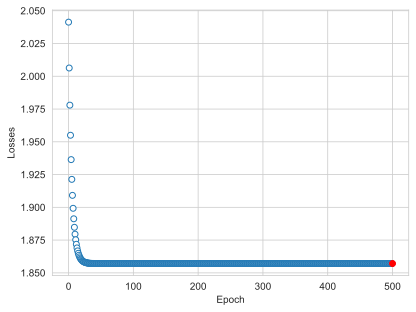

In [6]:
predictions = ann_reg(x)

test_loss = (predictions-y).__pow__(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.plot(num_epochs, test_loss.detach(), 'ro')
plt.xlabel("Epoch")
plt.ylabel("Losses")

In [7]:
test_loss.item()

1.857108235359192

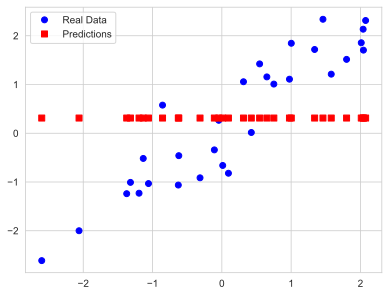

In [8]:
plt.plot(x, y, 'bo', label="Real Data")
plt.plot(x, predictions.detach(), 'rs', label="Predictions")
plt.legend()

# Manipulate Regression Slopes for continous values

In [9]:
def regression(m):
    n = 50
    x = torch.randn(n, 1)
    y = m*x + torch.randn(n, 1)/2
    ann_reg = nn.Sequential(nn.Linear(1, 1), nn.ReLU(), nn.Linear(1, 1))
    learning_rate = 0.05
    loss_fun = nn.MSELoss()
    optimizer = torch.optim.SGD(ann_reg.parameters(), lr=learning_rate)
    num_epochs = 500
    losses = torch.zeros(num_epochs)
    
    for epoch in range(num_epochs):
        y_hat = ann_reg(x)
        loss = loss_fun(y_hat, y)
        losses[epoch] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    return y_hat, losses, y

In [10]:
m = np.round(np.linspace(-2, 2, 21), decimals=3)
times = 50
results = np.zeros((len(m), times, 2))

for slope in range(len(m)):
    for time in range(times):
        pred, loss, y = regression(m[slope])
        results[slope, time, 0] = loss[-1]
        results[slope, time, 1] = np.corrcoef(y.T, pred.detach().T)[0, 1]

results[np.isnan(results)] = 0

C:\Users\drkum\DataspellProjects\deep_learning_pytorch\venv\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\drkum\DataspellProjects\deep_learning_pytorch\venv\lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Text(0.5, 1.0, 'Model Performance')

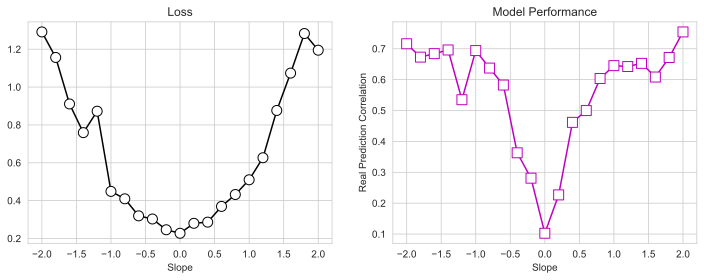

In [11]:
figure, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(m, np.mean(results[:, :, 0], axis=1), 'ko-', markerfacecolor='w', markersize=10)
ax[0].set_xlabel("Slope")
ax[0].set_title("Loss")

ax[1].plot(m, np.mean(results[:, :, 1], axis=1), 'ms-', markerfacecolor='w', markersize=10)
ax[1].set_xlabel("Slope")
ax[1].set_ylabel("Real Prediction Correlation")
ax[1].set_title("Model Performance")

# Binary Classification

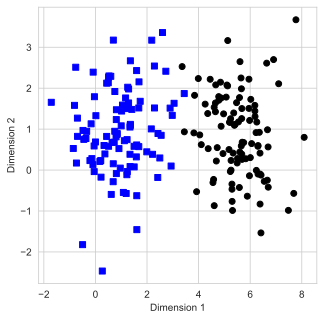

In [12]:
nPerClust = 100

A = [1, 1]
B = [5.5, 1]
np.random.seed(15)
a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

plt.figure(figsize=(5,5))
plt.plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
plt.plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [13]:
ann_class = nn.Sequential(nn.Linear(2,1), nn.ReLU(), nn.Linear(1,1), nn.Sigmoid())
ann_class

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [14]:
learningRate = 0.04669230769230769
loss_fun = nn.BCELoss()
optimizer = torch.optim.SGD(ann_class.parameters(),lr=learningRate)

In [15]:
num_epochs = 500
losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    y_hat = ann_class(data_tensor)
    loss = loss_fun(y_hat,labels_tensor)
    losses[epoch] = loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Text(0, 0.5, 'Loss')

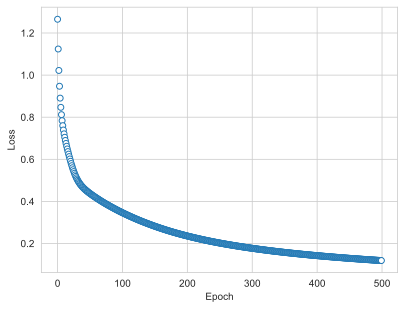

In [16]:
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [17]:
predictions = ann_class(data_tensor)
predict_labels = predictions>.5

misclassified = np.where(predict_labels != labels_tensor)[0]

total_acc = 100-100*len(misclassified)/(2*nPerClust)

print('Final accuracy: %g%%' %total_acc)

Final accuracy: 98%


Text(0.5, 1.0, '98.0% correct')

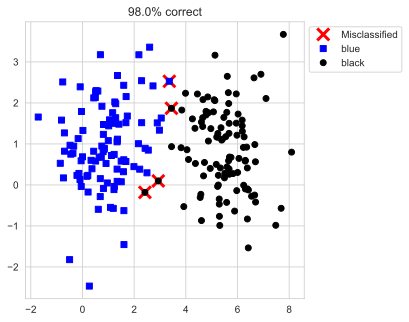

In [18]:
fig = plt.figure(figsize=(5,5))
plt.plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
plt.plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{total_acc}% correct')

Text(0, 0.5, 'Dimension 2')

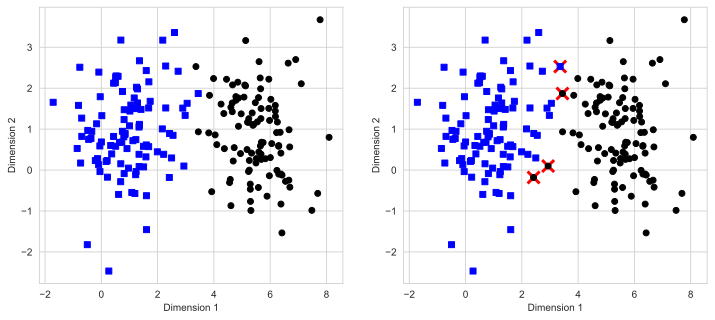

In [19]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
ax[0].plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")

ax[1].plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax[1].plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
ax[1].plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")

# Changing the Learning rates

In [20]:
def create_ann_model(learning_rate):
    ann_class = nn.Sequential(nn.Linear(2,1), nn.ReLU(), nn.Linear(1,1))
    loss_fun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(ann_class.parameters(),lr=learningRate)
    return ann_class, loss_fun, optimizer

In [21]:
num_epochs = 1500

def training_model(ann_class):
    losses = torch.zeros(num_epochs)

    for epoch in range(num_epochs):
        y_hat = ann_class(data_tensor)
        loss = loss_fun(y_hat,labels_tensor)
        losses[epoch] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ann_class(data_tensor)
    total_acc = 100*torch.mean(((predictions > 0) == labels_tensor).float())
    
    return losses, predictions, total_acc

Final Accuracy: 99%


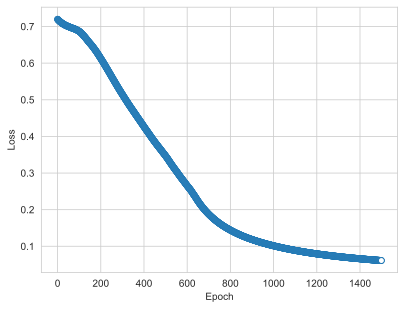

In [22]:
ann_class, loss_fun, optimizer = create_ann_model(0.01)
losses, predictions, total_acc = training_model(ann_class)

print("Final Accuracy: %g%%" %total_acc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss");

In [23]:
learning_rates = np.linspace(0.001, 0.1, 40)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

for i, lr in enumerate(learning_rates):
    ann_class, loss_fun, optimizer = create_ann_model(lr)
    losses, predictions, total_acc = training_model(ann_class)
    acc_by_lr.append(total_acc)
    all_losses[i] = losses.detach()

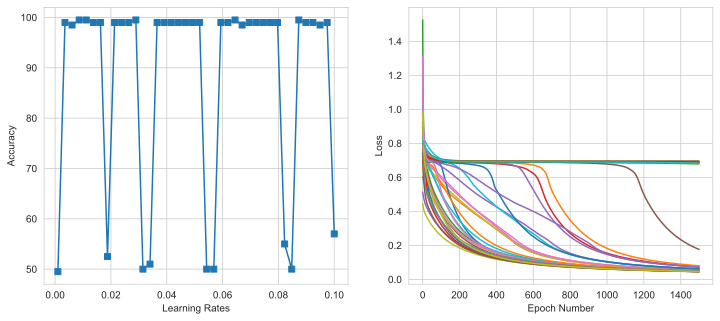

In [24]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(learning_rates, acc_by_lr, 's-')
ax[0].set_xlabel("Learning Rates")
ax[0].set_ylabel("Accuracy")

ax[1].plot(all_losses.T)
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss");

# Experiment to get more reliable results

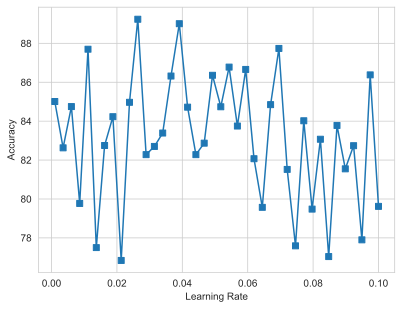

In [25]:
num_exp = 50
acc_by_exp = np.zeros((num_exp, len(learning_rates)))

num_epochs = 500

for exp_i in range(num_exp):
    for i, lr in enumerate(learning_rates):
        ann_class, loss_fun, optimizer = create_ann_model(lr)
        losses, predictions, total_acc = training_model(ann_class)
        acc_by_exp[exp_i, i] = total_acc

plt.plot(learning_rates, np.mean(acc_by_exp, axis=0), 's-')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy");

# Using Multi Layer ANN

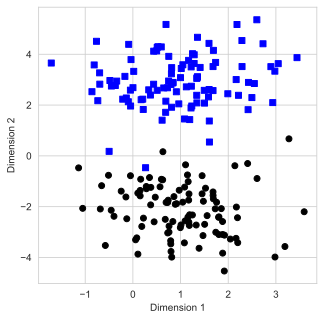

In [26]:
nPerClust = 100

A = [1, 3]
B = [1, -2]
np.random.seed(15)
a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

plt.figure(figsize=(5,5))
plt.plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
plt.plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [27]:
def create_ann_model(learning_rate):
    ann_class = nn.Sequential(nn.Linear(2, 16), nn.ReLU(), nn.Linear(16,1), nn.ReLU(), nn.Linear(1, 1), nn.Sigmoid())
    loss_fun = nn.BCELoss()
    optimizer = torch.optim.SGD(ann_class.parameters(),lr=learningRate)
    return ann_class, loss_fun, optimizer

In [28]:
num_epochs = 1500

def training_model(ann_class):
    losses = torch.zeros(num_epochs)

    for epoch in range(num_epochs):
        y_hat = ann_class(data_tensor)
        loss = loss_fun(y_hat,labels_tensor)
        losses[epoch] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ann_class(data_tensor)
    total_acc = 100*torch.mean(((predictions > 0.5) == labels_tensor).float())

    return losses, predictions, total_acc

Final Accuracy: 99%


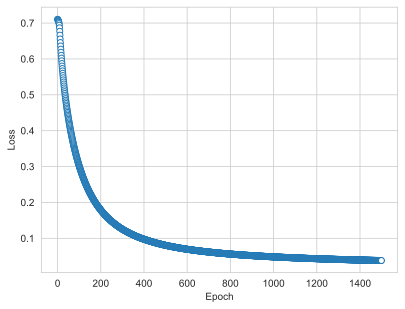

In [29]:
ann_class, loss_fun, optimizer = create_ann_model(0.01)
losses, predictions, total_acc = training_model(ann_class)

print("Final Accuracy: %g%%" %total_acc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss");

In [30]:
predict_labels = predictions > 0.5
misclassified = np.where(predict_labels != labels_tensor)[0]

Text(0, 0.5, 'Dimension 2')

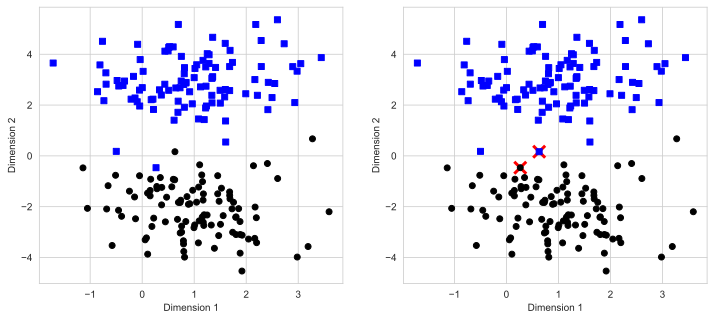

In [31]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
ax[0].plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")

ax[1].plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax[1].plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
ax[1].plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")

# Using multiple learning rates on multi layer ann

In [32]:
learning_rates = np.linspace(0.001, 0.1, 50)
acc_by_lr = []
all_losses = np.zeros((len(learning_rates), num_epochs))

for i, lr in enumerate(learning_rates):
    ann_class, loss_fun, optimizer = create_ann_model(lr)
    losses, predictions, total_acc = training_model(ann_class)
    acc_by_lr.append(total_acc)
    all_losses[i] = losses.detach()

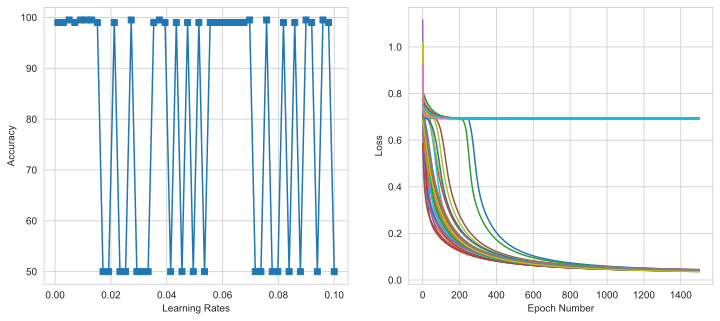

In [33]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(learning_rates, acc_by_lr, 's-')
ax[0].set_xlabel("Learning Rates")
ax[0].set_ylabel("Accuracy")

ax[1].plot(all_losses.T)
ax[1].set_xlabel("Epoch Number")
ax[1].set_ylabel("Loss");

# Removing the NonLinearity activation functions from the multi layer network

In [34]:
def create_ann_model(learning_rate):
    ann_class = nn.Sequential(nn.Linear(2, 16), nn.Linear(16,1), nn.Linear(1, 1), nn.Sigmoid())
    loss_fun = nn.BCELoss()
    optimizer = torch.optim.SGD(ann_class.parameters(),lr=learningRate)
    return ann_class, loss_fun, optimizer

In [35]:
num_epochs = 1500

def training_model(ann_class):
    losses = torch.zeros(num_epochs)

    for epoch in range(num_epochs):
        y_hat = ann_class(data_tensor)
        loss = loss_fun(y_hat,labels_tensor)
        losses[epoch] = loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ann_class(data_tensor)
    total_acc = 100*torch.mean(((predictions > 0.5) == labels_tensor).float())

    return losses, predictions, total_acc

Final Accuracy: 99%


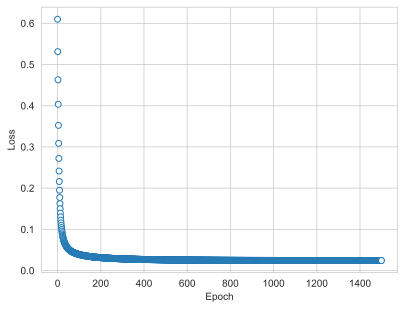

In [36]:
ann_class, loss_fun, optimizer = create_ann_model(0.01)
losses, predictions, total_acc = training_model(ann_class)

print("Final Accuracy: %g%%" %total_acc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss");

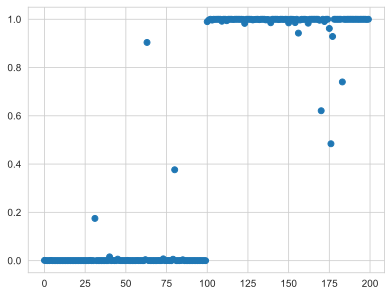

In [37]:
plt.plot(predictions.detach(), 'o')

In [38]:
predict_labels = predictions > 0.5
misclassified = np.where(predict_labels != labels_tensor)[0]

Text(0, 0.5, 'Dimension 2')

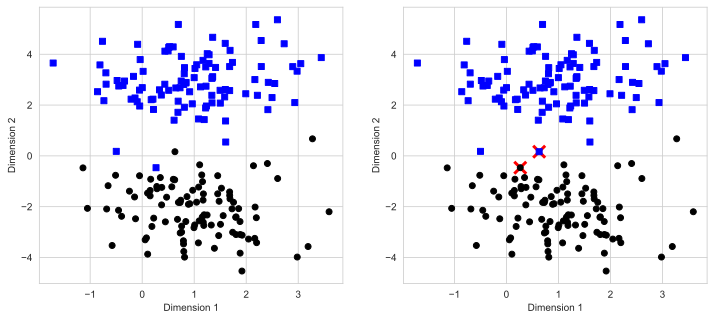

In [39]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
ax[0].plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")

ax[1].plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax[1].plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
ax[1].plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")

# Multi Output ANN (Iris Dataset)

In [40]:
import seaborn as sns

iris_data = sns.load_dataset('iris')

iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\drkum\DataspellProjects\deep_learning_pytorch\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


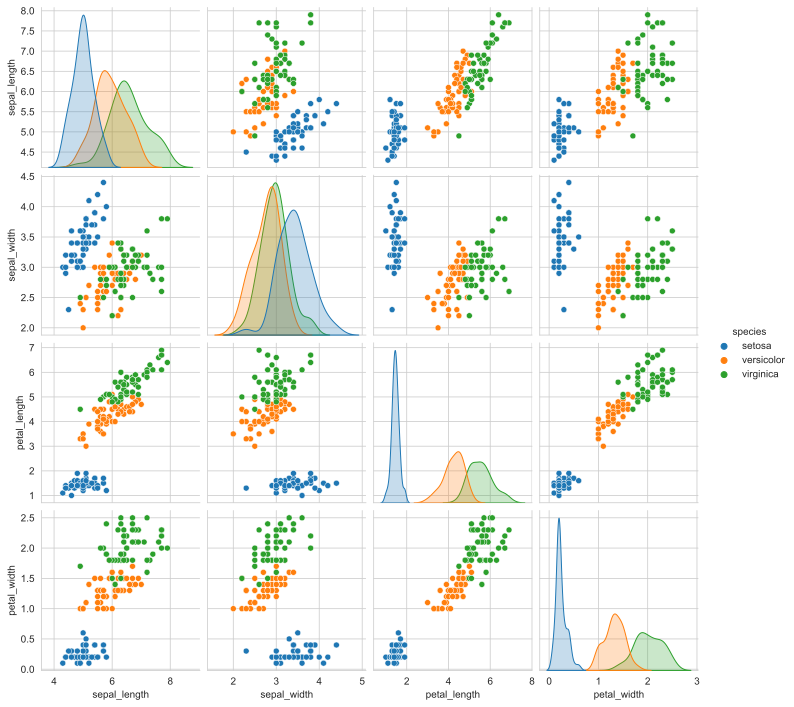

In [41]:
sns.pairplot(data=iris_data, hue='species');

In [42]:
data_tensor = torch.tensor(iris_data[iris_data.columns[:4]].values).float()

labels_tensor = torch.zeros(len(data_tensor), dtype=torch.long)
labels_tensor[iris_data.species=="versicolor"] = 1
labels_tensor[iris_data.species=="virginica"] = 2
labels_tensor.shape

torch.Size([150])

In [43]:
ann_iris = nn.Sequential(nn.Linear(4, 64), nn.ReLU(), nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, 3))

loss_fun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ann_iris.parameters(), lr = 0.01)

ann_iris

Sequential(
  (0): Linear(in_features=4, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=3, bias=True)
)

In [44]:
num_epochs = 1000

losses = torch.zeros(num_epochs)
ongoing_acc = []

for epoch in range(num_epochs):
    y_hat = ann_iris(data_tensor)
    
    loss = loss_fun(y_hat, labels_tensor)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    matches = torch.argmax(y_hat, axis=1) == labels_tensor
    matchesNumeric = matches.float()
    acc_predict = 100*torch.mean(matchesNumeric)
    ongoing_acc.append(acc_predict)

predictions = ann_iris(data_tensor)
predict_labels = torch.argmax(predictions, axis=1)
total_acc = 100*torch.mean((predict_labels == labels_tensor).float())

Final Accuracy - 98%


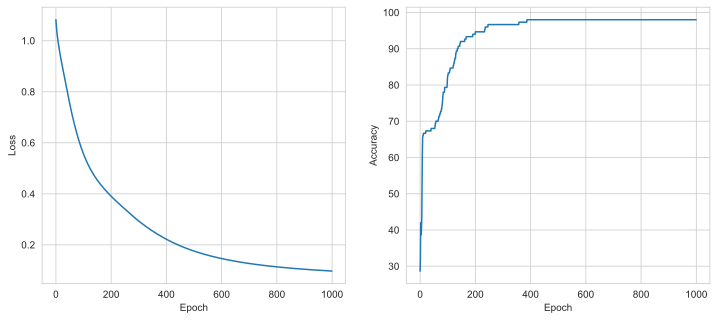

In [45]:
print("Final Accuracy - %g%%" %total_acc)
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")

ax[1].plot(ongoing_acc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch");

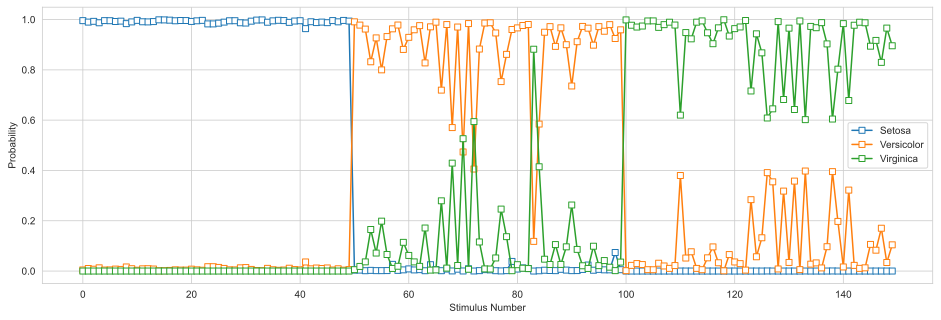

In [46]:
plt.figure(figsize=(16, 5))
sm = nn.Softmax(1)
plt.plot(sm(y_hat.detach()), 's-', markerfacecolor='w')
plt.xlabel("Stimulus Number")
plt.ylabel("Probability")
plt.legend(["Setosa", "Versicolor", "Virginica"]);

# Three Armies Classification using Softmax Functions

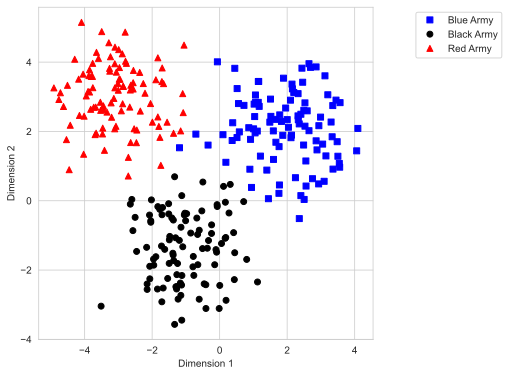

In [47]:
nPerClust = 100

A = [2, 2]
B = [-1, -1.5]
C = [-3, 3]
np.random.seed(20)
a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]
c = [C[0]+np.random.randn(nPerClust), C[1]+np.random.randn(nPerClust)]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)), np.ones((nPerClust, 1))+1))
data_np = np.hstack((a, b, c)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.squeeze(torch.tensor(labels_np).long())

plt.figure(figsize=(6,6))
plt.plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
plt.plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
plt.plot(data_tensor[np.where(labels_tensor==2)[0],0],data_tensor[np.where(labels_tensor==2)[0],1],'r^')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(["Blue Army", "Black Army", "Red Army"], bbox_to_anchor=(1.4,1));

In [48]:
army_classify = nn.Sequential(nn.Linear(2, 8), nn.ReLU(), nn.Linear(8, 8), nn.ReLU(), nn.Linear(8, 3), nn.Softmax(dim=1))

loss_fun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(army_classify.parameters(), lr = 0.01)

army_classify

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=8, bias=True)
  (3): ReLU()
  (4): Linear(in_features=8, out_features=3, bias=True)
  (5): Softmax(dim=1)
)

In [49]:
num_epochs = 10000

losses = torch.zeros(num_epochs)
ongoing_acc = []

for epoch in range(num_epochs):
    y_hat = army_classify(data_tensor)
    loss = loss_fun(y_hat, labels_tensor)
    losses[epoch] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    matches = torch.argmax(y_hat, axis=1) == labels_tensor
    matchesNumeric = matches.float()
    acc_predict = 100*torch.mean(matchesNumeric)
    ongoing_acc.append(acc_predict)

predictions = army_classify(data_tensor)
predict_labels = torch.argmax(predictions, axis=1)
total_acc = 100*torch.mean((predict_labels == labels_tensor).float())

Final Accuracy - 99.6667%


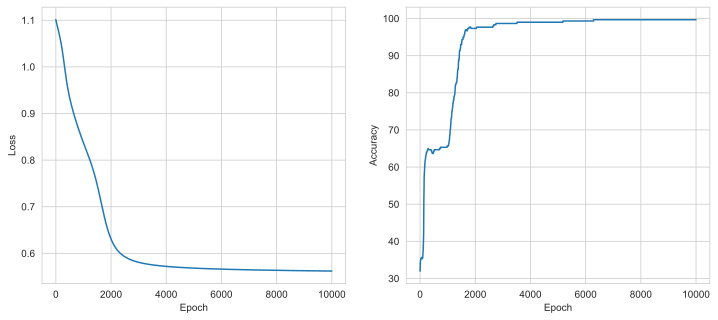

In [50]:
print("Final Accuracy - %g%%" %total_acc)
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(losses.detach())
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")

ax[1].plot(ongoing_acc)
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch");

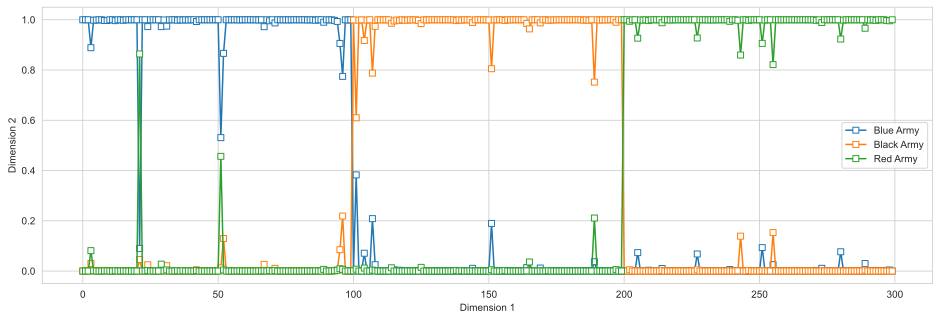

In [51]:
plt.figure(figsize=(16, 5))
plt.plot(y_hat.detach(), 's-', markerfacecolor='w')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend(["Blue Army", "Black Army", "Red Army"]);

# Checking iris data set with number of hidden units

In [52]:
data_tensor = torch.tensor(iris_data[iris_data.columns[:4]].values).float()

labels_tensor = torch.zeros(len(data_tensor), dtype=torch.long)
labels_tensor[iris_data.species=="versicolor"] = 1
labels_tensor[iris_data.species=="virginica"] = 2

In [53]:
def ann_iris_model(unit):
    ann_iris = nn.Sequential(nn.Linear(4, unit), nn.ReLU(), nn.Linear(unit, unit), nn.Linear(unit, 3))

    loss_fun = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(ann_iris.parameters(), lr = 0.01)
    
    return ann_iris, loss_fun, optimizer

In [54]:
num_epochs = 150

def check_accuracy(ann_iris, loss_fun, optimizer):
    for epoch in range(num_epochs):
        y_hat = ann_iris(data_tensor)
    
        loss = loss_fun(y_hat, labels_tensor)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ann_iris(data_tensor)
    predict_labels = torch.argmax(predictions, axis=1)
    total_acc = 100*torch.mean((predict_labels == labels_tensor).float())
    
    return total_acc

In [55]:
hidden_units = 128
accuracy_per_unit = np.zeros((hidden_units, 2))

for unit in range(1, hidden_units+1):
    ann_iris, loss_fun, optimizer = ann_iris_model(unit)
    total_acc = check_accuracy(ann_iris, loss_fun, optimizer)
    accuracy_per_unit[unit-1] = total_acc, unit

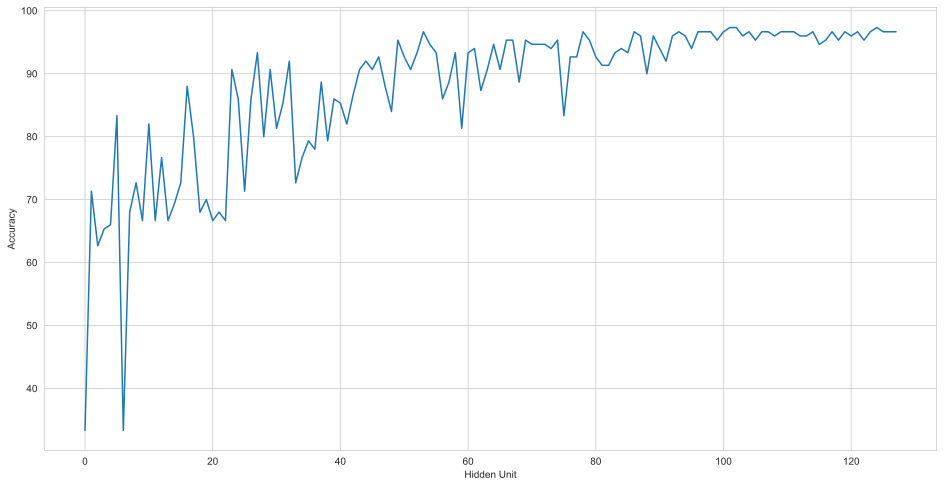

In [56]:
plt.figure(figsize=(16, 8))
plt.plot(accuracy_per_unit[:, 0])
plt.xlabel("Hidden Unit")
plt.ylabel("Accuracy");

# Number of Parameters : Depth and Breadth

In [57]:
wide_net = nn.Sequential(nn.Linear(2, 4), nn.Linear(4, 3))

deep_net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2), nn.Linear(2, 3))

print(wide_net)
print(deep_net)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [58]:
for param in wide_net.named_parameters():
    print(param)
    print()

('0.weight', Parameter containing:
tensor([[ 0.5496, -0.6983],
        [ 0.5999,  0.3549],
        [ 0.3238, -0.4112],
        [-0.0576, -0.1824]], requires_grad=True))

('0.bias', Parameter containing:
tensor([ 0.4814,  0.2600, -0.0955,  0.0149], requires_grad=True))

('1.weight', Parameter containing:
tensor([[ 0.3945,  0.1981, -0.4082,  0.0941],
        [ 0.0238,  0.0225,  0.0908, -0.2616],
        [-0.1632, -0.4104, -0.4930,  0.2431]], requires_grad=True))

('1.bias', Parameter containing:
tensor([-0.1632,  0.1106,  0.3169], requires_grad=True))


In [59]:
num_nodes_in_wide = 0
for param_name, param_vector in wide_net.named_parameters():
    if 'bias' in param_name:
        num_nodes_in_wide += len(param_vector)

num_nodes_in_wide

7

In [60]:
num_nodes_in_wide = 0
for param_name, param_vector in wide_net.named_parameters():
    if 'bias' in param_name:
        num_nodes_in_wide += len(param_vector)

num_nodes_in_wide

7

In [61]:
num_weights_in_deep = 0
for param in deep_net.parameters():
    if param.requires_grad:
        num_weights_in_deep += param.numel()

num_weights_in_deep

21

In [62]:
num_weights_in_wide = 0
for param in wide_net.parameters():
    if param.requires_grad:
        num_weights_in_wide += param.numel()

num_weights_in_wide

27

In [63]:
from torchsummary import summary
summary(wide_net.cuda(), (1, 2))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 4]              12
            Linear-2                 [-1, 1, 3]              15
Total params: 27
Trainable params: 27
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


# All the code above are created using PyTorch Sequential function, and now we are going to create our own classes using PyTorch Model

In [64]:
import torch.nn.functional as F

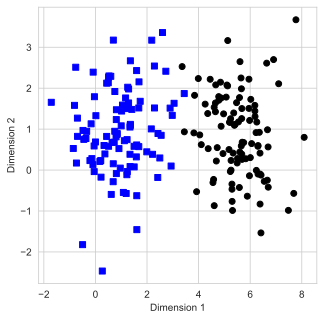

In [65]:
nPerClust = 100

A = [1, 1]
B = [5.5, 1]
np.random.seed(15)
a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

plt.figure(figsize=(5,5))
plt.plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
plt.plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [66]:
class ANNBinaryClassModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input = nn.Linear(2, 1)
        
        self.output = nn.Linear(1, 1)
    
    def forward(self, x):
        x = self.input(x)
        
        x = F.relu(x)
        
        x = self.output(x)
        
        x = torch.sigmoid(x)
        
        return x

annBinaryClassModel = ANNBinaryClassModel()

In [67]:
learning_rate = 0.1

loss_fun = nn.BCELoss()

optimizer = torch.optim.SGD(annBinaryClassModel.parameters(), lr = learning_rate)

In [68]:
num_epochs = 1000

losses = torch.zeros(num_epochs)

for epoch in range(num_epochs):
    y_hat = annBinaryClassModel(data_tensor)
    
    loss = loss_fun(y_hat, labels_tensor)
    losses[epoch] = loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

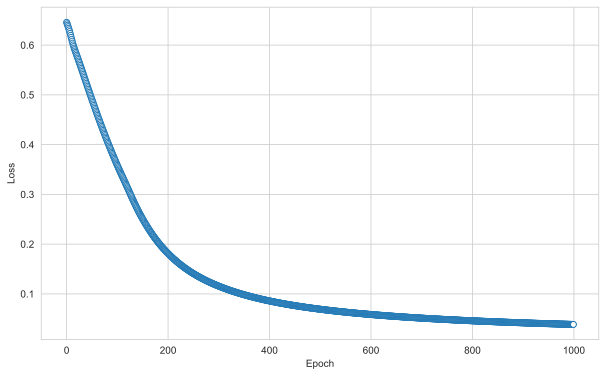

In [69]:
plt.figure(figsize=(10, 6))
plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss");

In [70]:
predictions = annBinaryClassModel(data_tensor)
predict_labels = predictions > 0.5

misclassified = np.where(predict_labels != labels_tensor)[0]

total_acc = 100-(100*len(misclassified)/(2*nPerClust))

print("Final Accuracy - %g%%" %total_acc)

Final Accuracy - 99%


Text(0, 0.5, 'Dimension 2')

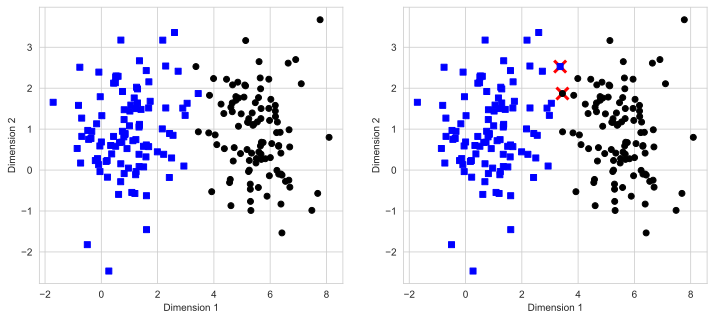

In [71]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
ax[0].plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")

ax[1].plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax[1].plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
ax[1].plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")

# Working with Iris Data with manipulation of Depth and Breadth 

In [72]:
import seaborn as sns

iris_data = sns.load_dataset('iris')

data_tensor = torch.tensor(iris_data[iris_data.columns[:4]].values).float()

labels_tensor = torch.zeros(len(data_tensor), dtype=torch.long)
labels_tensor[iris_data.species=="versicolor"] = 1
labels_tensor[iris_data.species=="virginica"] = 2

In [73]:
class ANNIris(nn.Module):
    def __init__(self, num_units, num_layers):
        super().__init__()
        
        self.layers = nn.ModuleDict()
        self.num_layers = num_layers
        
        self.layers["input"] = nn.Linear(4, num_units)
        
        for i in range(num_layers):
            self.layers[f"hidden{i}"] = nn.Linear(num_units, num_units)
            
        self.layers["output"] = nn.Linear(num_units, 3)
        
    def forward(self, x):
        x = self.layers["input"](x)
        
        for i in range(self.num_layers):
            x = F.relu(self.layers[f"hidden{i}"](x))
        
        x = self.layers["output"](x)
        
        return x

In [74]:
num_units_per_layer = 12
num_layers = 4
annIris = ANNIris(num_units_per_layer, num_layers)
annIris

ANNIris(
  (layers): ModuleDict(
    (input): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)

In [75]:
def trainModel(num_epochs, model):
    
    loss_fun = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(annIris.parameters(), lr=0.01)
    
    for epoch in range(num_epochs):
        y_hat = annIris(data_tensor)
    
        loss = loss_fun(y_hat, labels_tensor)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = annIris(data_tensor)
    predict_labels = torch.argmax(predictions, axis=1)
    total_acc = 100*torch.mean((predict_labels == labels_tensor).float())
    num_params = sum(param.numel() for param in annIris.parameters() if param.requires_grad)
    
    return total_acc, num_params

In [76]:
num_layers = range(1, 6)
num_units = np.arange(4, 101, 3)

total_acc = np.zeros((len(num_units), len(num_layers)))
total_params = np.zeros((len(num_units), len(num_layers)))

num_epochs = 500

for unit in range(len(num_units)):
    for layer in range(len(num_layers)):
        annIris = ANNIris(unit, layer)
        acc, param = trainModel(num_epochs ,annIris)
        total_acc[unit, layer] = acc
        total_params[unit, layer] = param

C:\Users\drkum\DataspellProjects\deep_learning_pytorch\venv\lib\site-packages\torch\nn\init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


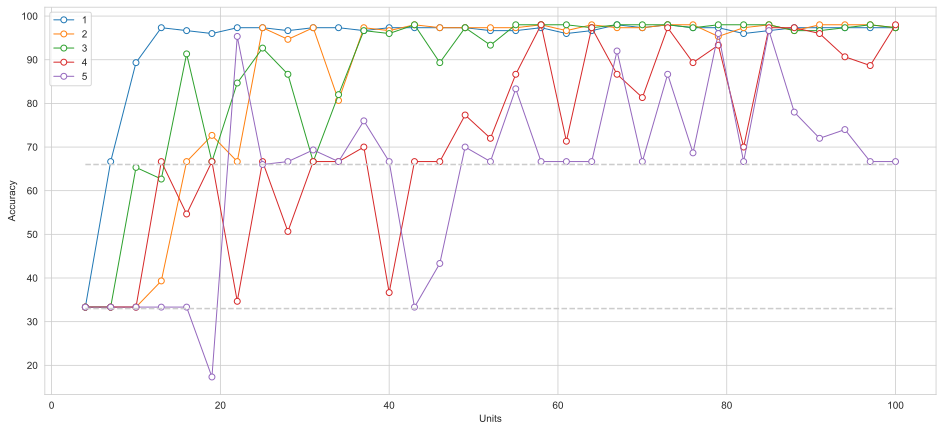

In [77]:
plt.figure(figsize=(16, 7))
plt.plot(num_units, total_acc, 'o-', markerfacecolor='w', linewidth=1)
plt.plot(num_units[[0, -1]], [33, 33], '--', color=[.8, .8, .8])
plt.plot(num_units[[0, -1]], [66, 66], '--', color=[.8, .8, .8])
plt.xlabel("Units")
plt.ylabel("Accuracy")
plt.legend(num_layers);

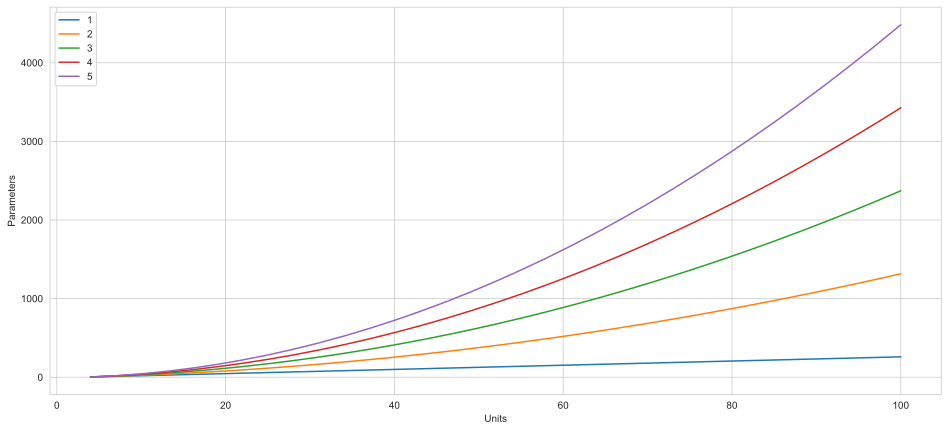

In [78]:
plt.figure(figsize=(16, 7))
plt.plot(num_units, total_params)
plt.xlabel("Units")
plt.ylabel("Parameters")
plt.legend(num_layers);

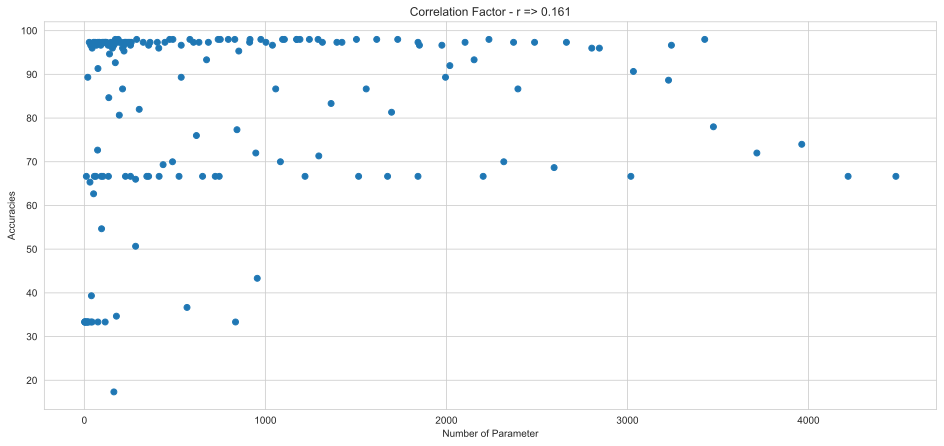

In [79]:
x = total_params.flatten()
y = total_acc.flatten()

r = np.corrcoef(x, y)[0, 1]

plt.figure(figsize=(16, 7))
plt.plot(x, y, 'o')
plt.xlabel("Number of Parameter")
plt.ylabel("Accuracies")
plt.title("Correlation Factor - r => " + str(np.round(r, 3)));

# Converting the Multi Layer ANN Sequential function to the Python class

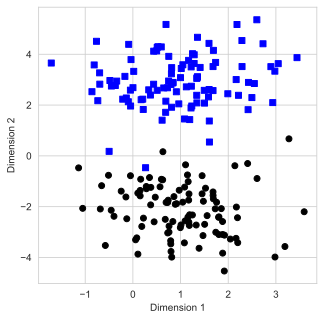

In [80]:
nPerClust = 100

A = [1, 3]
B = [1, -2]
np.random.seed(15)
a = [A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust)]
b = [B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust)]

labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))
data_np = np.hstack((a,b)).T

data_tensor = torch.tensor(data_np).float()
labels_tensor = torch.tensor(labels_np).float()

plt.figure(figsize=(5,5))
plt.plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
plt.plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [81]:
class MultiLayerANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 16)
        
        self.hidden = nn.Linear(16, 1)
        
        self.output = nn.Linear(1, 1)
        
    def forward(self, x):
        x = self.input(x)
        
        x = F.relu(x)
        
        x = self.hidden(x)
        
        x = F.relu(x)
        
        x = self.output(x)
        
        x = torch.sigmoid(x)
        
        return x
    
multiLayerANN = MultiLayerANN()

loss_fun = nn.BCELoss()

optimizer = torch.optim.SGD(multiLayerANN.parameters(), lr=0.01)

In [82]:
num_epochs = 1500

def training_model(ann_class):
    losses = torch.zeros(num_epochs)

    for epoch in range(num_epochs):
        y_hat = ann_class(data_tensor)
        
        loss = loss_fun(y_hat,labels_tensor)
        losses[epoch] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ann_class(data_tensor)
    total_acc = 100*torch.mean(((predictions > 0.5) == labels_tensor).float())

    return losses, predictions, total_acc

Final Accuracy: 99%


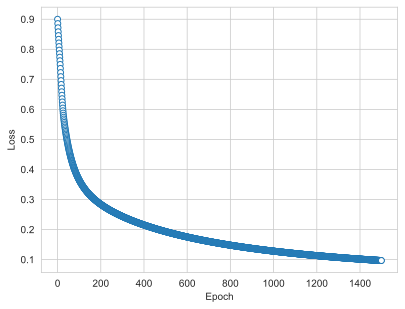

In [83]:
losses, predictions, total_acc = training_model(multiLayerANN)

print("Final Accuracy: %g%%" %total_acc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel("Epoch")
plt.ylabel("Loss");

In [84]:
predict_labels = predictions > 0.5
misclassified = np.where(predict_labels != labels_tensor)[0]

Text(0, 0.5, 'Dimension 2')

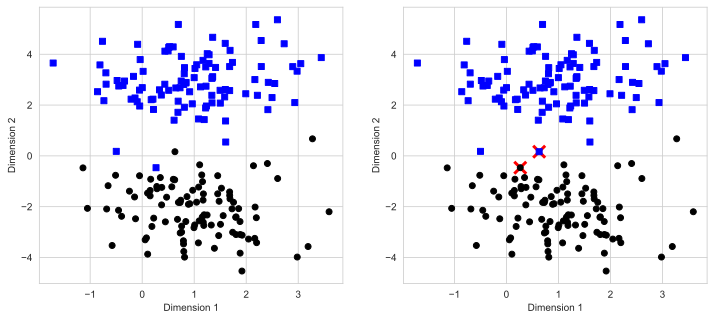

In [85]:
_, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(data_tensor[np.where(labels_tensor==0)[0],0],data_tensor[np.where(labels_tensor==0)[0],1],'bs')
ax[0].plot(data_tensor[np.where(labels_tensor==1)[0],0],data_tensor[np.where(labels_tensor==1)[0],1],'ko')
ax[0].set_xlabel("Dimension 1")
ax[0].set_ylabel("Dimension 2")

ax[1].plot(data_tensor[misclassified,0] ,data_tensor[misclassified,1],'rx',markersize=12,markeredgewidth=3)
ax[1].plot(data_tensor[np.where(~predict_labels)[0],0],data_tensor[np.where(~predict_labels)[0],1],'bs')
ax[1].plot(data_tensor[np.where(predict_labels)[0],0] ,data_tensor[np.where(predict_labels)[0],1] ,'ko')
ax[1].set_xlabel("Dimension 1")
ax[1].set_ylabel("Dimension 2")